Cel Rick D. Almario From BSCS 3B

# Topic 2.2: Bayesian Networks
Implementation of Bayesian Networks in Google Colab
Exercise 1: Setting Up the Environment
1. Install the Required Library:
• Start by installing pgmpy in your Google Colab environment.

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00


# 2. Import Libraries:
• Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Building a Simple Bayesian Network
1. Define the Structure:
• Create a Bayesian Network for the following variables: Weather (Sunny, Rainy),
Traffic (Light, Heavy), and Late (On Time, Late). Define the relationships:
o Traffic depends on Weather.
o Late depends on Traffic.

In [4]:
# Define the structure of the Bayesian Network
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])


# 2. Define Conditional Probability Tables (CPTs):
• Use TabularCPD to define the CPDs for each variable

In [16]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

# Create a Bayesian Model
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Weather CPD
cpd_weather = TabularCPD(variable="Weather", variable_card=2, values=[[0.7], [0.3]])

# Traffic CPD given Weather
cpd_traffic = TabularCPD(
    variable="Traffic", variable_card=2,
    values=[[0.9, 0.5], [0.1, 0.5]],
    evidence=["Weather"], evidence_card=[2]
)

# Late CPD given Traffic
cpd_late = TabularCPD(
    variable="Late", variable_card=2,
    values=[[0.95, 0.8], [0.05, 0.2]],
    evidence=["Traffic"], evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Check if the model is valid
assert model.check_model()

# Print the CPDs
for cpd in model.get_cpds():
    print(cpd)


+------------+-----+
| Weather(0) | 0.7 |
+------------+-----+
| Weather(1) | 0.3 |
+------------+-----+
+------------+------------+------------+
| Weather    | Weather(0) | Weather(1) |
+------------+------------+------------+
| Traffic(0) | 0.9        | 0.5        |
+------------+------------+------------+
| Traffic(1) | 0.1        | 0.5        |
+------------+------------+------------+
+---------+------------+------------+
| Traffic | Traffic(0) | Traffic(1) |
+---------+------------+------------+
| Late(0) | 0.95       | 0.8        |
+---------+------------+------------+
| Late(1) | 0.05       | 0.2        |
+---------+------------+------------+


# Exercise 3: Querying the Bayesian Network
1. Perform Exact Inference:
o Use the variable elimination method to determine the probability of being
Late given that it is Rainy.

In [8]:
from pgmpy.inference import VariableElimination

# Create an Inference object
inference = VariableElimination(model)

# Query the probability of being late given that Weather is Rainy
result = inference.query(variables=['Late'], evidence={'Weather': 1})  # 1 corresponds to Rainy

print(result)


+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.8750 |
+---------+-------------+
| Late(1) |      0.1250 |
+---------+-------------+


# Exercise 4: Parameter Learning
1. Simulate a Dataset:
o Create a synthetic dataset of observations for Weather, Traffic, and Late.

In [9]:
import numpy as np
import pandas as pd

# Create a synthetic dataset
# 0 for Sunny, 1 for Rainy
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

# Fill Traffic based on Weather
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 0].shape[0], p=[0.9, 0.1])
data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 1].shape[0], p=[0.5, 0.5])

# Fill Late based on Traffic
data['Late'] = np.where(
    data['Traffic'] == 0, np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

print(data.head())


   Weather  Traffic  Late
0        0      0.0     0
1        0      0.0     0
2        1      1.0     0
3        1      1.0     1
4        0      1.0     1


# 2. Estimate the Parameters:
• Use the dataset to estimate the CPDs for the Traffic and Late nodes.

In [11]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
import pandas as pd

# Create a Bayesian Model
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Assuming 'data' is a pandas DataFrame with columns 'Weather', 'Traffic', and 'Late'
data = pd.DataFrame({
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy'],
    'Traffic': ['Heavy', 'Heavy', 'Light', 'Light', 'Heavy'],
    'Late': ['Yes', 'Yes', 'No', 'No', 'Yes']
})

# Fit the model to the data using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Check the estimated CPDs
for cpd in model.get_cpds():
    print(cpd)


+----------------+-----+
| Weather(Rainy) | 0.4 |
+----------------+-----+
| Weather(Sunny) | 0.6 |
+----------------+-----+
+----------------+----------------+--------------------+
| Weather        | Weather(Rainy) | Weather(Sunny)     |
+----------------+----------------+--------------------+
| Traffic(Heavy) | 1.0            | 0.3333333333333333 |
+----------------+----------------+--------------------+
| Traffic(Light) | 0.0            | 0.6666666666666666 |
+----------------+----------------+--------------------+
+-----------+----------------+----------------+
| Traffic   | Traffic(Heavy) | Traffic(Light) |
+-----------+----------------+----------------+
| Late(No)  | 0.0            | 1.0            |
+-----------+----------------+----------------+
| Late(Yes) | 1.0            | 0.0            |
+-----------+----------------+----------------+


# Exercise 5: Visualizing the Bayesian Network
1. Visualize the Network Structure:
o Use the networkx library to visualize the Bayesian Network.

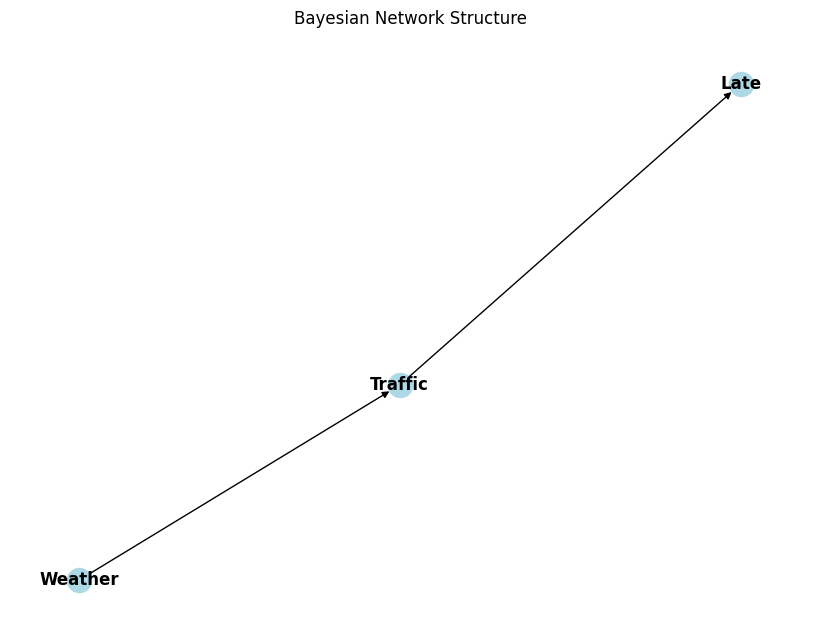

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

# Create a Bayesian Model
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Manually convert the Bayesian Network to a NetworkX graph
nx_graph = nx.DiGraph()

# Add nodes and edges from the Bayesian Network to the NetworkX graph
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(8, 6))

pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True
)

plt.title('Bayesian Network Structure')
plt.show()
